In [19]:
import sys
sys.path.append("..")

from datetime import datetime
import numpy as np
import ujson as json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from lib.dataclasses import SignalDCT, SignalTime, SingleSample, Sample, SignalSpectrum, SignalDFT
from lib.utils import get_sample_from_json
from pywt import WaveletPacket
from copy import deepcopy

plt.style.use('ggplot')
from matplotlib.gridspec import GridSpec

In [2]:
PATH_TO_SAMPLE = "/workspaces/project/raw/time_examples/2022_11_16_19_44.json"

In [9]:
sample_id = PATH_TO_SAMPLE.split(".json")[0].split("/")[-1]

# sample in time domain
time_sample = get_sample_from_json(PATH_TO_SAMPLE, sample_id, dct=False)

# signal in different domains
time_signal = time_sample[0]["y"]
dft_signal = time_sample[0]["y"].to_dft()


In [5]:
t, x = time_signal.get()
f, X_dft = dft_signal.get(full=False)

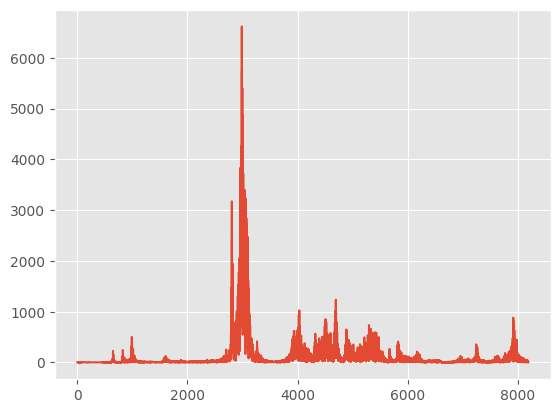

In [6]:
plt.plot(np.abs(X_dft))

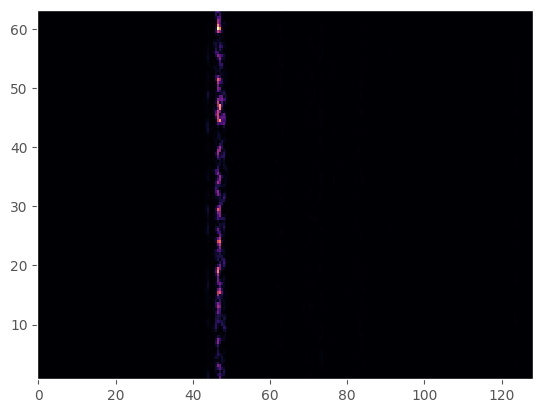

In [17]:
spectrogram_signal = time_signal.to_spectrogram(window="hamming", nperseg=512, poverlap=0.75)
fig = plt.figure()
ax = fig.add_subplot()
spectrogram_signal.plot(ax, cmap="magma")